<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<h2 align=center>VALIDATION OF DATASET</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 5: Validation of dataset

In [2]:
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding= 'unicode_escape')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Through the different analysis of the dataset we have noticed a strange behaviour of some data. Among these, we notice negative numbers, different profit for same product/client/store, repeated sales import in USD in consecutive sales among others. This led us to check if the dataset has been manipulated in some way. In order to clarify this doubt we'll apply the benford law to the dataset and see if the numbers follow the natural distribution.

To clarify what is the Benford Law and how it should look like, we detail the meaning below and we'll create a distribution of fibonacci numbers.

##### Benford's Law:  in a naturally occurring set of numbers, the smaller digits appear disproportionately more often as the leading digits. 

That means that the first digit in a number series will likely be a small number (from 1 to 9). The frequency of numbers will follow a distribution like this one:

 1 = 30.1% frequency of occurrence
 
 2 = 17.6% frequency of occurrence

 3 = 12.5% frequency of occurrence
 
 4 = 9.7% frequency of occurrence
 
 5 = 7.9% frequency of occurrence
 
 6 = 6.7% frequency of occurrence
 
 7 = 5.8% frequency of occurrence

 8 = 5.1% frequency of occurrence
 
 9 = 4.6% frequency of occurrence
 
Graphically we can see it like the following plot:

<AxesSubplot:>

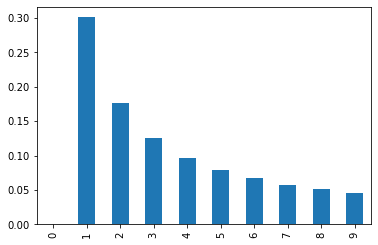

In [5]:
def fibo(x):
    fibnum = []
    for i in range (x+1):
        if i== 0:
            fibnum.append(0)
        elif i==1:
            fibnum.append(1)
        else:
            newnum = fibnum[-1]+fibnum[-2]
            fibnum.append(newnum)
    return fibnum

array = fibo(50000)
fibo_series = pd.Series(array)
fibo_series = fibo_series.astype(str).str[0].astype(int)
df_benford = fibo_series.value_counts(normalize=True).sort_index()
df_benford.plot.bar()

To evaluate the dataset we'll see if the different series of numeric data follow this law or not.

##### Benford's law applied to the quantity of items ordered in each order

<AxesSubplot:>

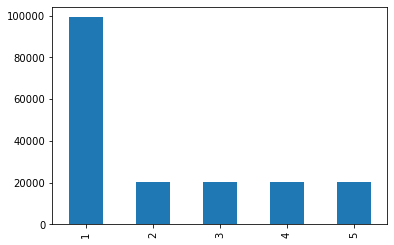

In [6]:
df_benford = df['Order Item Quantity'].astype(str).str[0].astype(int)
df_benford = df_benford.value_counts().sort_index()
df_benford.plot.bar()

##### Benford's law applied to the prices of the products

<AxesSubplot:>

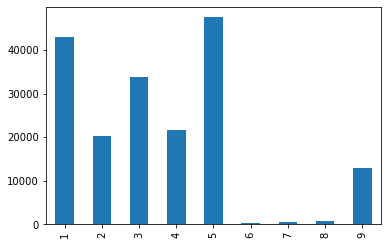

In [7]:
df_benford2 = df['Order Item Product Price'].astype(str).str[0].astype(int)
df_benford2 = df_benford2.value_counts().sort_index()
df_benford2.plot.bar()

##### Benford's law applied to the sales of each order

<AxesSubplot:>

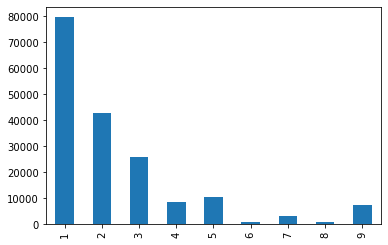

In [8]:
df_benford4 = df['Sales'].astype(str).str[0].astype(int)
df_benford4 = df_benford4.value_counts().sort_index()
df_benford4.plot.bar()

##### Benford's law applied to the profit of the company (Positive profit)

<AxesSubplot:>

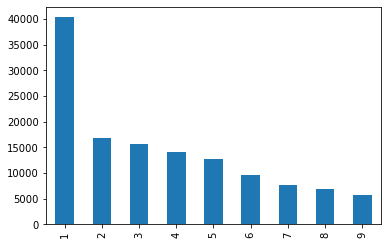

In [9]:
df_benford4 = df[df['Order Profit Per Order']>=10]['Order Profit Per Order'].astype(str).str[0].astype(int)
df_benford4 = df_benford4.value_counts().sort_index()
df_benford4.plot.bar()

##### Benford's law applied to the profit of the company (Negative profit)

<AxesSubplot:>

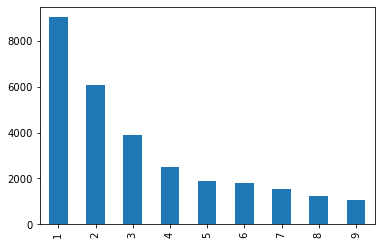

In [10]:
df_benford4 = (df[df['Order Profit Per Order']<-10]['Order Profit Per Order'])*-1
df_benford4 = df_benford4.astype(str).str[0].astype(int)
df_benford4 = df_benford4.value_counts().sort_index()
df_benford4.plot.bar()

##### Benford's law applied to the discounts

<AxesSubplot:>

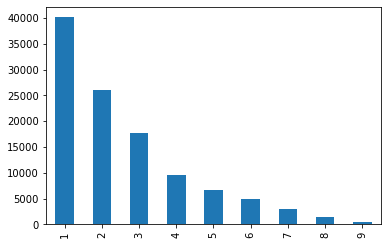

In [11]:
df_benford4 = df[df['Order Item Discount']>=10]['Order Item Discount'].astype(str).str[0].astype(int)
df_benford4 = df_benford4.value_counts().sort_index()
df_benford4.plot.bar()

##### Conclusion:

* Profit and discounts conform to Benford's distribution.


* On the other hand, the quantity of items and prices do not follow the expected distribution. According to studies, prices do not always follow Benford's law, so this could explain the anomaly behaviour. Regarding the quantity of items, it is suspected that the data has been manipulated.


* Finally, the distribution of sales is inconclusive, because although it seems to follow the expected distribution, it has limited records with data beginning with 6, 7 and 8. 